In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from datetime import datetime, timedelta

In [14]:
ts = hisse_df.set_index("DATE")[sutun]
ts.index = pd.DatetimeIndex(ts.index, freq="QS")

In [24]:
print("Sütun adları:")
print(df_split.columns.tolist())
hisseler = df_split["NAME"].unique()
print("Hisseler:", hisseler)

Sütun adları:
['NAME', 'DATE', 'OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOLUME']
Hisseler: ['THYAO' 'GARAN' 'AKBNK' 'TUPRS']


In [34]:
df = pd.read_csv("TÜRKborsası.csv")
df.columns = ['data']
df_split = df['data'].str.split(';', expand=True)
df_split.columns = ['NAME', 'DATE', 'OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOLUME']

In [40]:
for col in ['OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOLUME']:
  df_split[col] = df_split[col].astype(float)
df_split["DATE"] = pd.to_datetime(df_split["DATE"], dayfirst=True)
hisseler = df_split["NAME"].unique()
print("Hisseler:", hisseler)  # Kontrol için
tahmin_tarihler = pd.date_range(start="2025-08-01", end="2026-12-01", freq="3MS")

Hisseler: ['THYAO' 'GARAN' 'AKBNK' 'TUPRS']


In [30]:
for hisse in hisseler:
    print(f"\n{hisse} Tablosu:")
    hisse_df = df_split[df_split["NAME"] == hisse].sort_values("DATE")
    print(hisse_df[["DATE", "OPEN", "HIGH", "LOW", "CLOSE", "VOLUME"]])

    tahmin_df = pd.DataFrame(index=tahmin_tarihler)
    for sutun in ["OPEN", "HIGH", "LOW", "CLOSE", "VOLUME"]:
        ts = hisse_df.set_index("DATE")[sutun]
        ts = ts.dropna()
        if len(ts) > 1:
            ts.index = pd.DatetimeIndex(ts.index, freq="QS")
            model = ExponentialSmoothing(ts, trend="add", seasonal=None)
            fit = model.fit()
            tahmin = fit.forecast(len(tahmin_tarihler))
            tahmin_df[sutun] = tahmin.values


THYAO Tablosu:
        DATE   OPEN   HIGH    LOW  CLOSE      VOLUME
0 2024-01-01  255.0  258.0  250.0  257.0  12000000.0
1 2024-04-01  295.0  298.0  290.0  297.0  11000000.0
2 2024-07-01  310.0  315.0  305.0  312.0  10500000.0
3 2024-10-01  320.0  325.0  315.0  322.0  10000000.0
4 2025-01-01  330.0  335.0  325.0  332.0   9500000.0
5 2025-04-01  340.0  345.0  335.0  342.0   9000000.0
6 2025-07-01  350.0  355.0  345.0  352.0   8500000.0

GARAN Tablosu:
         DATE  OPEN  HIGH   LOW  CLOSE      VOLUME
7  2024-01-01  41.0  41.5  40.0   41.2  18000000.0
8  2024-04-01  48.0  48.8  47.0   48.5  17000000.0
9  2024-07-01  50.0  51.0  49.0   50.8  16500000.0
10 2024-10-01  52.0  53.0  51.0   52.5  16000000.0
11 2025-01-01  54.0  55.0  53.0   54.8  15500000.0
12 2025-04-01  56.0  57.0  55.0   56.7  15000000.0
13 2025-07-01  58.0  59.0  57.0   58.6  14500000.0

AKBNK Tablosu:
         DATE  OPEN  HIGH   LOW  CLOSE      VOLUME
14 2024-01-01  36.0  36.5  35.0   36.2  14000000.0
15 2024-04-01  41.

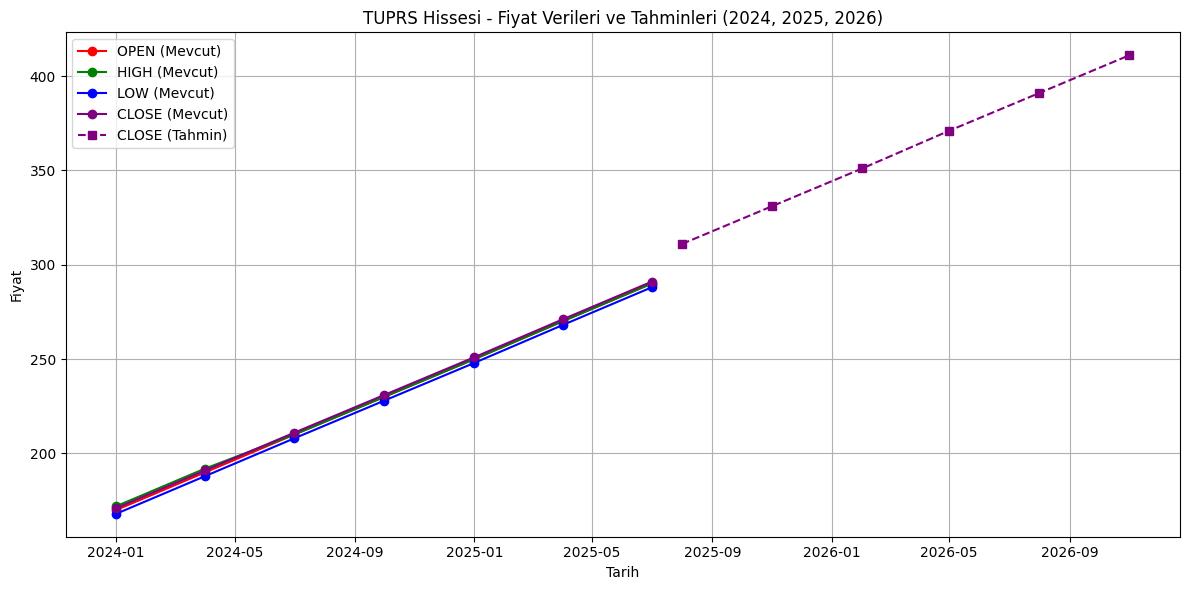

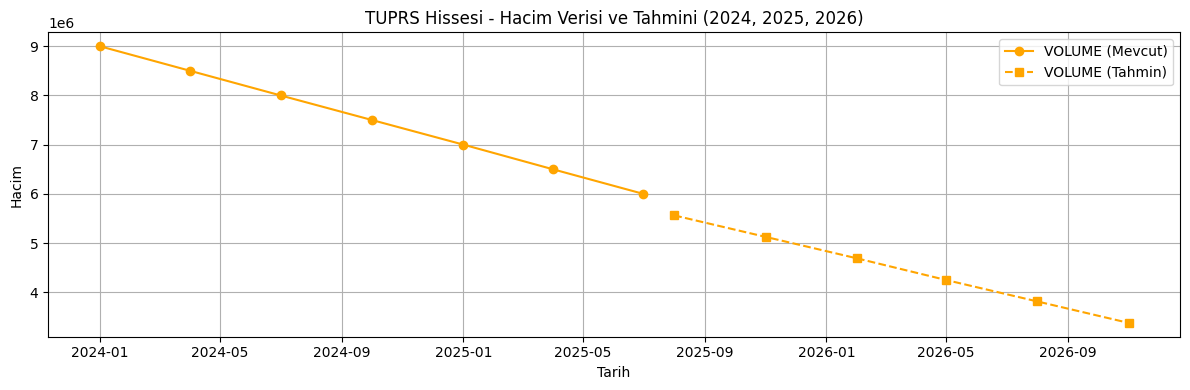

In [38]:
plt.figure(figsize=(12, 6))
for sutun, renk in zip(["OPEN", "HIGH", "LOW", "CLOSE"], ["red", "green", "blue", "purple"]):
   plt.plot(hisse_df["DATE"], hisse_df[sutun], label=f"{sutun} (Mevcut)", color=renk, linestyle='-', marker='o')
if sutun in tahmin_df:
            plt.plot(tahmin_df.index, tahmin_df[sutun], label=f"{sutun} (Tahmin)", color=renk, linestyle='--', marker='s')
plt.title(f"{hisse} Hissesi - Fiyat Verileri ve Tahminleri (2024, 2025, 2026)")
plt.xlabel("Tarih")
plt.ylabel("Fiyat")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
plt.figure(figsize=(12, 4))
plt.plot(hisse_df["DATE"], hisse_df["VOLUME"], label="VOLUME (Mevcut)", color="orange", marker='o')
if "VOLUME" in tahmin_df:
        plt.plot(tahmin_df.index, tahmin_df["VOLUME"], label="VOLUME (Tahmin)", color="orange", linestyle='--', marker='s')
plt.title(f"{hisse} Hissesi - Hacim Verisi ve Tahmini (2024, 2025, 2026)")
plt.xlabel("Tarih")
plt.ylabel("Hacim")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()